In [1]:
import pyspark
import pandas as pd
import os

In [2]:
import pyspark.mllib.clustering  as cl

In [3]:
try:
    sc.stop()
    conf = pyspark.SparkConf()
except:
    pass
sc = pyspark.SparkContext()

In [4]:
cw = pd.read_csv("../data/天气.csv",encoding='utf-8',engine = 'python')

In [5]:
cw.head()

,FID,city,day,max,min,weather,wind,windDesc,x,y
0,0,阿城,2017/5/4 0:00:00,12,-4,晴,西南风,小于3级~3-4级,116.057433,36.172429
1,1,安达,2017/5/4 0:00:00,12,-3,晴,西风,4-5级,125.384552,46.535467
2,2,安图,2017/5/4 0:00:00,13,-6,多云转晴,西北风~西风,小于3级,128.437652,42.701033
3,3,鞍山,2017/5/4 0:00:00,13,0,晴转多云,北风,4-5级~3-4级,123.007763,41.118744
4,4,阿鲁旗,2017/5/4 0:00:00,10,-4,晴转多云,东风,3-4级,104.269039,25.020963


In [6]:
dataSet = [(m1,m2)for m1,m2 in zip(cw["max"],cw["min"])]

In [7]:
rdd = sc.parallelize(dataSet)

In [8]:
rdd.take(1)

[(12, -4)]

# 聚类分析

In [9]:
clusters = cl.KMeans.train(rdd, 5, maxIterations=10, initializationMode="random")

# 聚类的中心点

In [10]:
clusters.clusterCenters

[array([29.46308017, 19.47362869]),
 array([13.37258348,  6.36379613]),
 array([19.67303103, 12.09785203]),
 array([11.92810458, -3.16666667]),
 array([ 0.01960784, -9.49019608])]

# 保存模型

# predict用训练好的模型，去进行聚类

In [11]:
cw["clf"] = clusters.predict(rdd).collect()

In [12]:
cw.head()

,FID,city,day,max,min,weather,wind,windDesc,x,y,clf
0,0,阿城,2017/5/4 0:00:00,12,-4,晴,西南风,小于3级~3-4级,116.057433,36.172429,3
1,1,安达,2017/5/4 0:00:00,12,-3,晴,西风,4-5级,125.384552,46.535467,3
2,2,安图,2017/5/4 0:00:00,13,-6,多云转晴,西北风~西风,小于3级,128.437652,42.701033,3
3,3,鞍山,2017/5/4 0:00:00,13,0,晴转多云,北风,4-5级~3-4级,123.007763,41.118744,3
4,4,阿鲁旗,2017/5/4 0:00:00,10,-4,晴转多云,东风,3-4级,104.269039,25.020963,3


In [13]:
import matplotlib.pyplot as plt

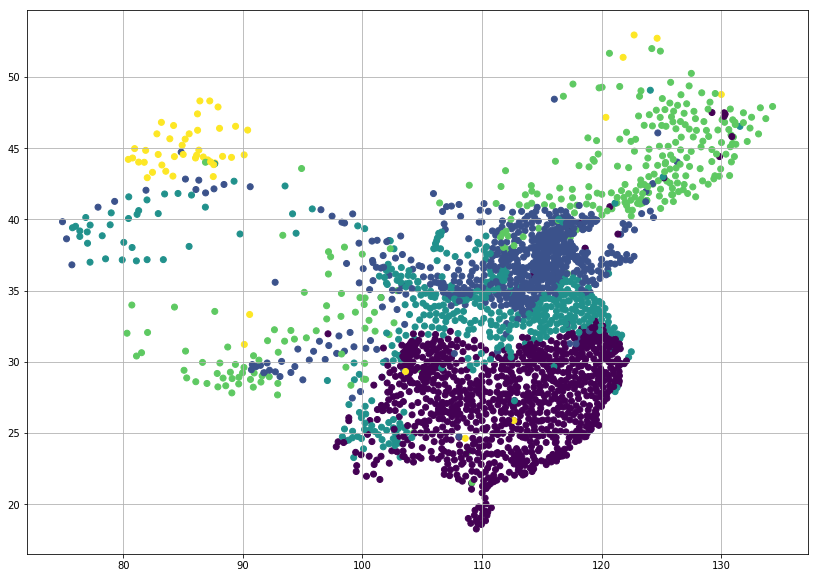

In [14]:
fig = plt.figure(figsize=(14,10))
ax = fig.gca() 
ax.grid(alpha= 1)
ax.scatter(cw["x"],cw["y"],c=cw["clf"])

In [15]:
rdd2 = sc.parallelize([(6,13)])
res = clusters.predict(rdd2).collect()
res

[1]

In [16]:
cw2 = cw[cw["clf"]==res[0]]

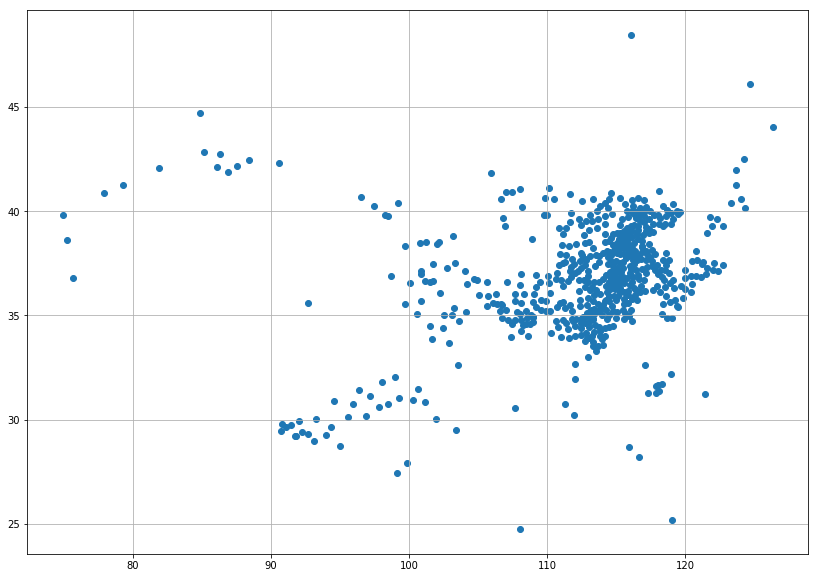

In [17]:
fig = plt.figure(figsize=(14,10))
ax = fig.gca() 
ax.grid(alpha= 1)
ax.scatter(cw2["x"],cw2["y"])